## mini-project II
Elements of Data Science

In [1]:
# Enter your name as a string
name = ...

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Mount Saint Helens Eruption  8:32 A.M. on May 18, 1980
We will explore data on ecosystem recovery following the volcanic eruption at Mount Saint Helens in Washington State.<br>
<img src='data/Eruption.jpg'><br><img src='data/800px-1980_St._Helens_ashmap.png'>

### Data Sets
Mount Saint Helens erupted at 8:32 A.M. on May 18, 1980. 
<br>
Professor Roger del Morales at University of Washington https://faculty.washington.edu/moral/ and his team set up circular, 9 meter radius, land plots near the volcano once it was safe to initiate the study in 1984. These plots are located in several distinct regions near the volcano cone to study the return of vegatation to these plots located in different positions relative to the colcanic cone (see mapping below). We will use this data to assess the rate of plant succession. Measures included in the data include yearly species richness, *RICHNESS*, defined as the number of species in a given region or in this case the 9 meter radius (250 m^2) land plot. We will use our data science tools to decide if the changes over time in *RICHNESS* are a pattern (Alternate hypothesis) or if they are just due to random fluctutaions (NULL hypothesis). Other variables include *COVER_%* which can also be analyzed. 

Data collected:
1. del Moral, Roger (2016): Thirty years of permanent vegetation plots, Mount St. Helens, Washington, USA. Wiley. Collection. https://doi.org/10.6084/m9.figshare.c.3303093.v1 
Source: https://figshare.com/collections/Thirty_years_of_permanent_vegetation_plots_Mount_St_Helens_Washington_USA/3303093

A papers using this data:
1. Del Moral, R.; Magnússon, B., "Surtsey and Mount St. Helens: a comparison of early succession rates". Biogeosciences 2014, 11 (7), 2099-2111.
https://faculty.washington.edu/moral/publications/2014%20delMoral%20Magnusson.pdf

2.  Cook, James E.; Halpern, Charles B., "Vegetation changes in blown-down and scorched forests 10–26 years after the eruption of Mount St. Helens, Washington, USA". Plant Ecology 2018, 219 (8), 957-972.
https://link.springer.com/content/pdf/10.1007/s11258-018-0849-8.pdf



### Mini project Goals and Rubric
1. Create initial data tables and plots to explore the nature of the different plots included in "data/MSH_PLOT_DESCRIPTORS2.csv". Variables to consider include  elevation, slope, aspect (direction), impact type. You could use group or pivot methods here.
2. Identify two *PLOT_CODE*s to study based on mapped location and characteristics given in "data/MSH_PLOT_DESCRIPTORS2.csv" file. Use a markdown cell to provide reasons for your two choices of plots. Include differences and similarities.
3. Carry out exploratory data analysis on the yearly data included in "data/MSH_STRUCTURE_PLOT_YEAR.csv" for each of the identified plots. 
2. Formulate a hypothesis regarding plant vegation (*COVER_%*) and variety (*RICHNESS*) following the eruption. You can refer to the above links and papers for ideas. Create a detailed markdown cell to detail this hypothesis.
3. State the NULL hypothesis for each measure.
4. Formulate a data science plan to simulate random changes following the first year of data.
5. Compare the the results of 1000+ simulations to the outcome.
6. Identify a good test statistic such as positive and negative changes or other.
7. Statistically test whether data supports the alternate hypothesis
    1. Compute a P-value. (Hint: you can use np.count_nonzero())
    2. Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses.
    3. Describe your findings using simple, non-technical language.
8. Examine data for a second *PLOT_CODE* and repeat proceedure.
9. Sum up your observations in a large markdown cell.

In [43]:
# Plot description dataset
datafile = "data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE(°),IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary
Toutle Ridge09,TORD09,1981,1997,10T,559599,5118216,122.227,46.2149,0.722,0.827,1417,NW,18,Blast edge,Secondary
Toutle Ridge08,TORD08,1981,1997,10T,559565,5118281,122.228,46.2155,0.788,0.833,1401,NNW,10,Blast edge,Secondary
Toutle Ridge07,TORD07,1981,1997,10T,559466,5118302,122.229,46.2157,0.756,0.786,1379,N,12,Blast edge,Secondary
Toutle Ridge06,TORD06,1981,1997,10T,559413,5118329,122.23,46.2159,0.835,0.877,1365,NW,7,Blast edge,Secondary
Toutle Ridge05,TORD05,1981,1997,10T,559342,5118366,122.231,46.2163,0.822,0.854,1352,NNW,7,Blast edge,Secondary
Toutle Ridge04,TORD04,1981,1997,10T,559279,5115125,122.232,46.1871,0.764,0.818,1340,NNW,12,Blast edge,Secondary
Toutle Ridge03,TORD03,1981,1997,10T,559238,5118483,122.232,46.2173,0.764,0.818,1320,NNW,12,Blast edge,Secondary
Toutle Ridge02,TORD02,1981,1997,10T,559091,5118480,122.234,46.2173,0.861,0.9,1294,WNW,6,Blast edge,Secondary
Toutle Ridge01,TORD01,1981,1997,10T,558992,5118569,122.235,46.2181,0.874,0.9,1280,WNW,4,Blast edge,Secondary


#### Biodiversity Data Collected following Mount Saint Helens Eruption
Data is collected anually on on developing biodiversity on defined plots of land with given latitude and longitude. Thes locations can be mapped using the *map_table* method of a table object. There are several related plots in different regions of the volcanic cone. Zoom in on map, click on each circle to view the label for the data series and select one of the datasets for further analysis.

In [54]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',radius=200)

In [47]:
# Plot vegatation trend yearly dataset
datafile = "data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1
ABPL011997,ABPL,1,1997,18,4.2,2.231,0.772,11.6
ABPL011999,ABPL,1,1999,19,5.9,2.268,0.77,14.2
ABPL012000,ABPL,1,2000,17,6.2,2.111,0.745,9.1
ABPL012001,ABPL,1,2001,16,20.3,1.721,0.621,11.3
ABPL012002,ABPL,1,2002,13,7.2,1.715,0.669,14.5
ABPL012003,ABPL,1,2003,13,6.1,2.008,0.783,17.7
ABPL012004,ABPL,1,2004,12,6.3,1.826,0.735,18.9
ABPL012005,ABPL,1,2005,8,4.9,1.491,0.717,20.8


In [50]:
np.unique(MSH_YEAR.column('PLOT_NAME')) #Return unique plot names

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'], dtype='<U4')

In [52]:
# Select a particular plot name based on examination of mapped data and descriptions in the plot description dataset.
PLT = 'STRD' # Put the name for study hear, i.e ='STRD'
data = MSH_YEAR.where('PLOT_NAME',are.contained_in(PLT)).sort('YEAR',descending=False)
data

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
STRD011984,STRD,1,1984,1,0.1,0,0,7
STRD021984,STRD,2,1984,2,0.2,0.693,1,1
STRD031984,STRD,3,1984,0,0,0,0,1
STRD041984,STRD,4,1984,0,0,0,0,0
STRD051984,STRD,5,1984,0,0,0,0,0
STRD061984,STRD,6,1984,0,0,0,0,0
STRD071984,STRD,7,1984,0,0,0,0,0
STRD081984,STRD,8,1984,0,0,0,0,0
STRD091984,STRD,9,1984,2,0.2,0.693,1,1
STRD101984,STRD,10,1984,1,0.1,0,0,1


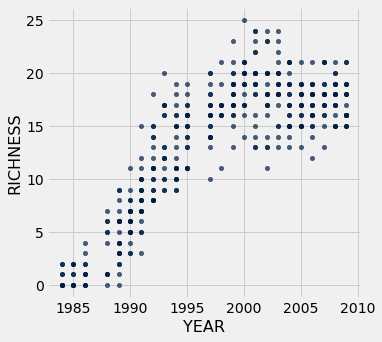

In [39]:
data.scatter('YEAR','RICHNESS')

In [ ]:
# Last cell to execute
import datetime
now = datetime.datetime.now()
now = now.strftime('%H:%M:%S on %A, %B the %dth, %Y')
print(" Submitted by ", name, " at ", now )